In [557]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy

In [558]:
def oracle(circuit, state):
    circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[7])
    circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[8])
    circuit.ccx(qreg_q[7], qreg_q[8], qreg_q[9])
    circuit.ccx(qreg_q[4], qreg_q[9], qreg_q[10])
    circuit.ccx(qreg_q[5], qreg_q[10], qreg_q[11])
    #circuit.cu(pi, 0, 0, 0, qreg_q[9], qreg_q[5])
    circuit.cz(qreg_q[11], qreg_q[6])
    circuit.ccx(qreg_q[5], qreg_q[10], qreg_q[11])
    circuit.ccx(qreg_q[4], qreg_q[9], qreg_q[10])
    circuit.ccx(qreg_q[7], qreg_q[8], qreg_q[9])
    circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[8])    
    circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[7])
    
    # Set the state here
    for ii, qubit in enumerate(state):
        #print('qubit ' , qubit)
        if qubit == 0:
            circuit.x(qreg_q[len(state) - 1 - ii])

        
    return circuit

In [559]:
def diffusion(circuit, state):
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8], qreg_q[9])
    
    circuit.h(qreg_q[0])
    circuit.h(qreg_q[1])
    circuit.h(qreg_q[2])
    circuit.h(qreg_q[3])
    circuit.h(qreg_q[4])
    circuit.h(qreg_q[5])
    circuit.h(qreg_q[6])
    circuit.x(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.x(qreg_q[2])
    circuit.x(qreg_q[3])
    circuit.x(qreg_q[4])
    circuit.x(qreg_q[5])
    circuit.x(qreg_q[6])

    
    circuit = oracle(circuit, state)
    
    circuit.x(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.x(qreg_q[2])
    circuit.x(qreg_q[3])
    circuit.x(qreg_q[4])
    circuit.x(qreg_q[5])  
    circuit.x(qreg_q[6])
    circuit.h(qreg_q[0])
    circuit.h(qreg_q[1])
    circuit.h(qreg_q[2])
    circuit.h(qreg_q[3])
    circuit.h(qreg_q[4])
    circuit.h(qreg_q[5])
    circuit.h(qreg_q[6])
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8], qreg_q[9])
    
    return circuit

In [571]:
qreg_q = QuantumRegister(12, 'q')
creg_c = ClassicalRegister(7, 'c')
grover_circuit = QuantumCircuit(qreg_q, creg_c)

In [572]:
# Superposition
grover_circuit.h(qreg_q[0])
grover_circuit.h(qreg_q[1])
grover_circuit.h(qreg_q[2])
grover_circuit.h(qreg_q[3])
grover_circuit.h(qreg_q[4])
grover_circuit.h(qreg_q[5])
grover_circuit.h(qreg_q[6])

grover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8], qreg_q[9])

In [573]:
SEARCH_STATE = [1,0,1,1,1,0,1]
ROTATIONS = 2
default = [1,1,1,1,1,1,1]

In [574]:
#grover_circuit.x(qreg_q[3])
#grover_circuit.x(qreg_q[2])

for ii in range(ROTATIONS):
    grover_circuit = oracle(grover_circuit, SEARCH_STATE)
    grover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8], qreg_q[9])
    grover_circuit = diffusion(grover_circuit, default)

'''
grover_circuit = oracle(grover_circuit, SEARCH_STATE)
grover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8], qreg_q[9])
grover_circuit = diffusion(grover_circuit, SEARCH_STATE)

grover_circuit = oracle(grover_circuit, SEARCH_STATE)
grover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8], qreg_q[9])
grover_circuit = diffusion(grover_circuit, SEARCH_STATE)
'''


'\ngrover_circuit = oracle(grover_circuit, SEARCH_STATE)\ngrover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8], qreg_q[9])\ngrover_circuit = diffusion(grover_circuit, SEARCH_STATE)\n\ngrover_circuit = oracle(grover_circuit, SEARCH_STATE)\ngrover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7], qreg_q[8], qreg_q[9])\ngrover_circuit = diffusion(grover_circuit, SEARCH_STATE)\n'

In [575]:
#grover_circuit.draw()

In [576]:
sim = Aer.get_backend('aer_simulator')
# we need to make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)

In [577]:
#result = sim.run(qobj).result()
#statevec = result.get_statevector()
#from qiskit_textbook.tools import vector2latex
#vector2latex(statevec, pretext="|\\psi\\rangle =")

In [578]:
#grover_circuit.x(qreg_q[3])

In [579]:
grover_circuit.measure([0,1,2,3,4,5,6],[0,1,2,3,4,5,6])
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
#grover_circuit.draw()

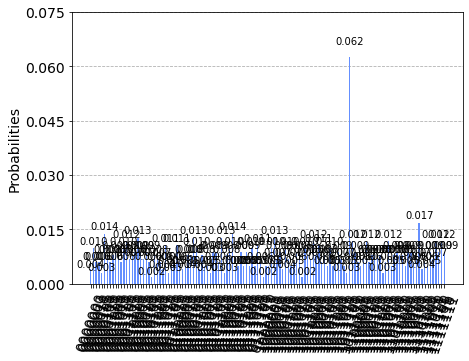

In [580]:
counts = result.get_counts()
plot_histogram(counts)

In [581]:
counts_d = dict(counts)
for w in sorted(counts_d, key=counts_d.get, reverse=True):
    print(w, counts_d[w])

#type(counts_lst)

1011101 64
1110110 17
0110011 14
0000101 14
0100101 13
0010001 13
1000010 13
0101111 13
1010000 12
1101011 12
0001101 12
1111100 12
1100011 12
1011110 12
1111110 12
0111100 11
0011011 11
0011111 11
1010010 11
1001101 10
0001100 10
0000001 10
0100110 10
0111010 10
0110010 10
1010110 10
1000001 10
1000110 10
0110110 9
0010100 9
1111111 9
1001010 9
0010000 9
0101101 9
1011111 9
0001001 9
1110010 9
1111101 9
1110011 9
1111010 9
0010010 9
0111000 9
1011001 9
1001011 9
1101110 9
1000100 9
0101100 9
0110001 8
1010100 8
1100101 8
1101111 8
1001110 8
0001010 8
1100111 8
0100100 8
0100011 8
0010111 8
0001111 8
0101000 8
1010001 8
1101101 8
1110000 8
0001000 8
0000110 8
1101000 8
1100110 8
1110101 7
1001111 7
1100010 7
1000111 7
1000011 7
0011000 7
1011010 7
1011000 7
0010011 7
0001110 7
1111011 7
0111101 6
1110100 6
0101110 6
1001001 6
0000010 6
0011001 6
1100100 6
1101010 6
0000011 6
0001011 6
0010101 6
1100000 6
1010011 6
0000111 6
0100000 6
0011110 6
1111000 6
0101001 5
1101100 5
1000000 5
01

# Real devices

In [86]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 6 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

ibmqfactory.load_account:WARNING:2022-08-15 10:36:28,126: Credentials are already in use. The existing account in the session will be replaced.


Running on current least busy device:  ibm_oslo


In [87]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Traceback (most recent call last):
  Input In [87] in <cell line: 3>
    transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
  File /opt/conda/lib/python3.8/site-packages/qiskit/compiler/transpiler.py:319 in transpile
    _check_circuits_coupling_map(circuits, cmap_conf, backend)
  File /opt/conda/lib/python3.8/site-packages/qiskit/compiler/transpiler.py:381 in _check_circuits_coupling_map
    raise TranspilerError(
TranspilerError: 'Number of qubits (10) in circuit-95 is greater than maximum (7) in the coupling_map'

Use %tb to get the full traceback.


In [ ]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)